In [148]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/farmers-adoption-data/Farmers Adoption Data Plateau State - Sheet1 (1).csv


# FARMERS TECHNOLOGY ADOPTION ANALYSIS
This is a personal project with objectives of:
1. **Investigating the factors influencing adoption of innovation among farmers(hopefully generalizable).**
This will be achieved through Exploratory Data Analysis
2. **Predicting Farmers' likelihood to adopt innovation.**
A model will be trained with the available data to achieve this.
3. **Assign individual farmers to various adoption clusters(Innovators....Laggards).**
Clustering will come into play, here.


This project is intended to be revisited quarterly, as more data becomes available, or better still deployed in order to make use of dynamic data.

The data for this work was extracted from various data sets collected primarily by students and staff of the Agricultural Extension and Management department of Federal College of Forestry, Jos, Plateau state, Nigeria, in their academic researches in various fields. It is also important to note at this point that, some of these data(definitely, more than one source) was not geared towards innovation adoption, hence, additional but non-intrusive work had to be done on the data to make it usable and relevant.

## Overall Approach/ Strategy
The war will be fought proceeding thus(read that in your inner villain voice):
* **Data Examination**
* **Data Exploration**
* **Data Cleaning/wrangling**
* **Data Visualization**
* **Feature Engineering**
* **Modelling**
* **Evaluating the Model**
* **Extraction for Deployment**

*Nick Renotte, the above has you written all over, in my book anyways*

Check link for raw(mischievious wink file). [Rough Outline](https://github.com/maranatha443/My-ML-Projects/blob/352436cb0f3fc56f6f654ff0af8364e8a6f4d8d4/WhatsApp%20Image%202022-06-24%20at%2012.12.23%20PM.jpeg?raw=true)

### Data Examination, Exploration, Cleaning, and Visualization.
Let's check our data mate.

In [149]:
abs# import relevant libraries, yeah I'm spoilt for choice, blame Nicholas @ world quaint uni.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly_express as px
print("Set-up complete")

Set-up complete


In [150]:
# Load the dataset.
df = pd.read_csv("../input/farmers-adoption-data/Farmers Adoption Data Plateau State - Sheet1 (1).csv")
df.head()

,AGE,SEX,EDUCATN STATUS,HH/SIZE,F/EXP,F/SIZE,EXT TRAINING,INCOME,ADOPTION STATUS
0,32,MALE,6,5,4,3,0,30000,1
1,32,FEMALE,12,4,5,4,1,31000,1
2,55,MALE,0,5,7,5,0,29000,1
3,56,FEMALE,12,6,8,3,0,26000,1
4,26,MALE,12,5,4,5,3,23000,0


In [151]:
# Let's Explore a bit.
print(df.shape)
df.info()

(501, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AGE              501 non-null    int64 
 1   SEX              501 non-null    object
 2   EDUCATN STATUS   501 non-null    int64 
 3   HH/SIZE          501 non-null    object
 4   F/EXP            501 non-null    int64 
 5   F/SIZE           501 non-null    int64 
 6   EXT TRAINING     501 non-null    int64 
 7   INCOME           501 non-null    int64 
 8   ADOPTION STATUS  501 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 35.4+ KB


It would seem as though our dataset, though small is lean enough at 501 instances for 9 features(Dr Cassie, am I right?). Let's dig deeper.

In [152]:
# Let's check the categorical variables.
df.select_dtypes("object").describe()

,SEX,HH/SIZE
count,501,501
unique,2,13
top,MALE,3
freq,342,119


Guess I concluded too soon, what with Household size being considered an object, Unacceptable!

In [153]:
# Cleaning Household size(Excel or SQL "clean", could really shine here.)
df[df["HH/SIZE"].str.contains("`")]

,AGE,SEX,EDUCATN STATUS,HH/SIZE,F/EXP,F/SIZE,EXT TRAINING,INCOME,ADOPTION STATUS
437,36,FEMALE,1,`1,2,3,2,75000,0


In [154]:
# Still cleaning...
df.loc[437, "HH/SIZE"] = 1

In [155]:
# Change Household size to integers.
df["HH/SIZE"] = df["HH/SIZE"].astype(int)

In [156]:
# Check it to confirm changes.
df.select_dtypes("object").describe()

,SEX
count,501
unique,2
top,MALE
freq,342


That's better.

In [157]:
# Describe numeric features.
df.select_dtypes("number").describe()

,AGE,EDUCATN STATUS,HH/SIZE,F/EXP,F/SIZE,EXT TRAINING,INCOME,ADOPTION STATUS
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02,501.000000
mean,41.656687,9.373253,3.984032,5.502994,5.105788,0.732535,2.405877e+05,0.514970
std,10.005294,5.660248,1.823114,3.332040,4.515616,0.812600,3.761635e+05,0.500275
min,19.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000e+04,0.000000
25%,34.000000,5.000000,3.000000,3.000000,2.000000,0.000000,3.500000e+04,0.000000
50%,40.000000,12.000000,4.000000,4.000000,4.000000,1.000000,9.765000e+04,1.000000
75%,50.000000,15.000000,5.000000,8.000000,6.000000,1.000000,2.123100e+05,1.000000
max,81.000000,18.000000,12.000000,19.000000,33.000000,3.000000,2.520000e+06,1.000000


Tentatively, we can kinda, sorta, see that "Income" is not in the same class(pun intended), and as such is a candidate for scaling, it's also looking severely riddled with noise.

AGE seems to be close to a normal distribution(mean close to median), with majority of farmers between 20 and 60, while EDUC seems to indicate a skew, though that was to be expected, more on that to come.


Let's try and understand more about the data points by visualization.

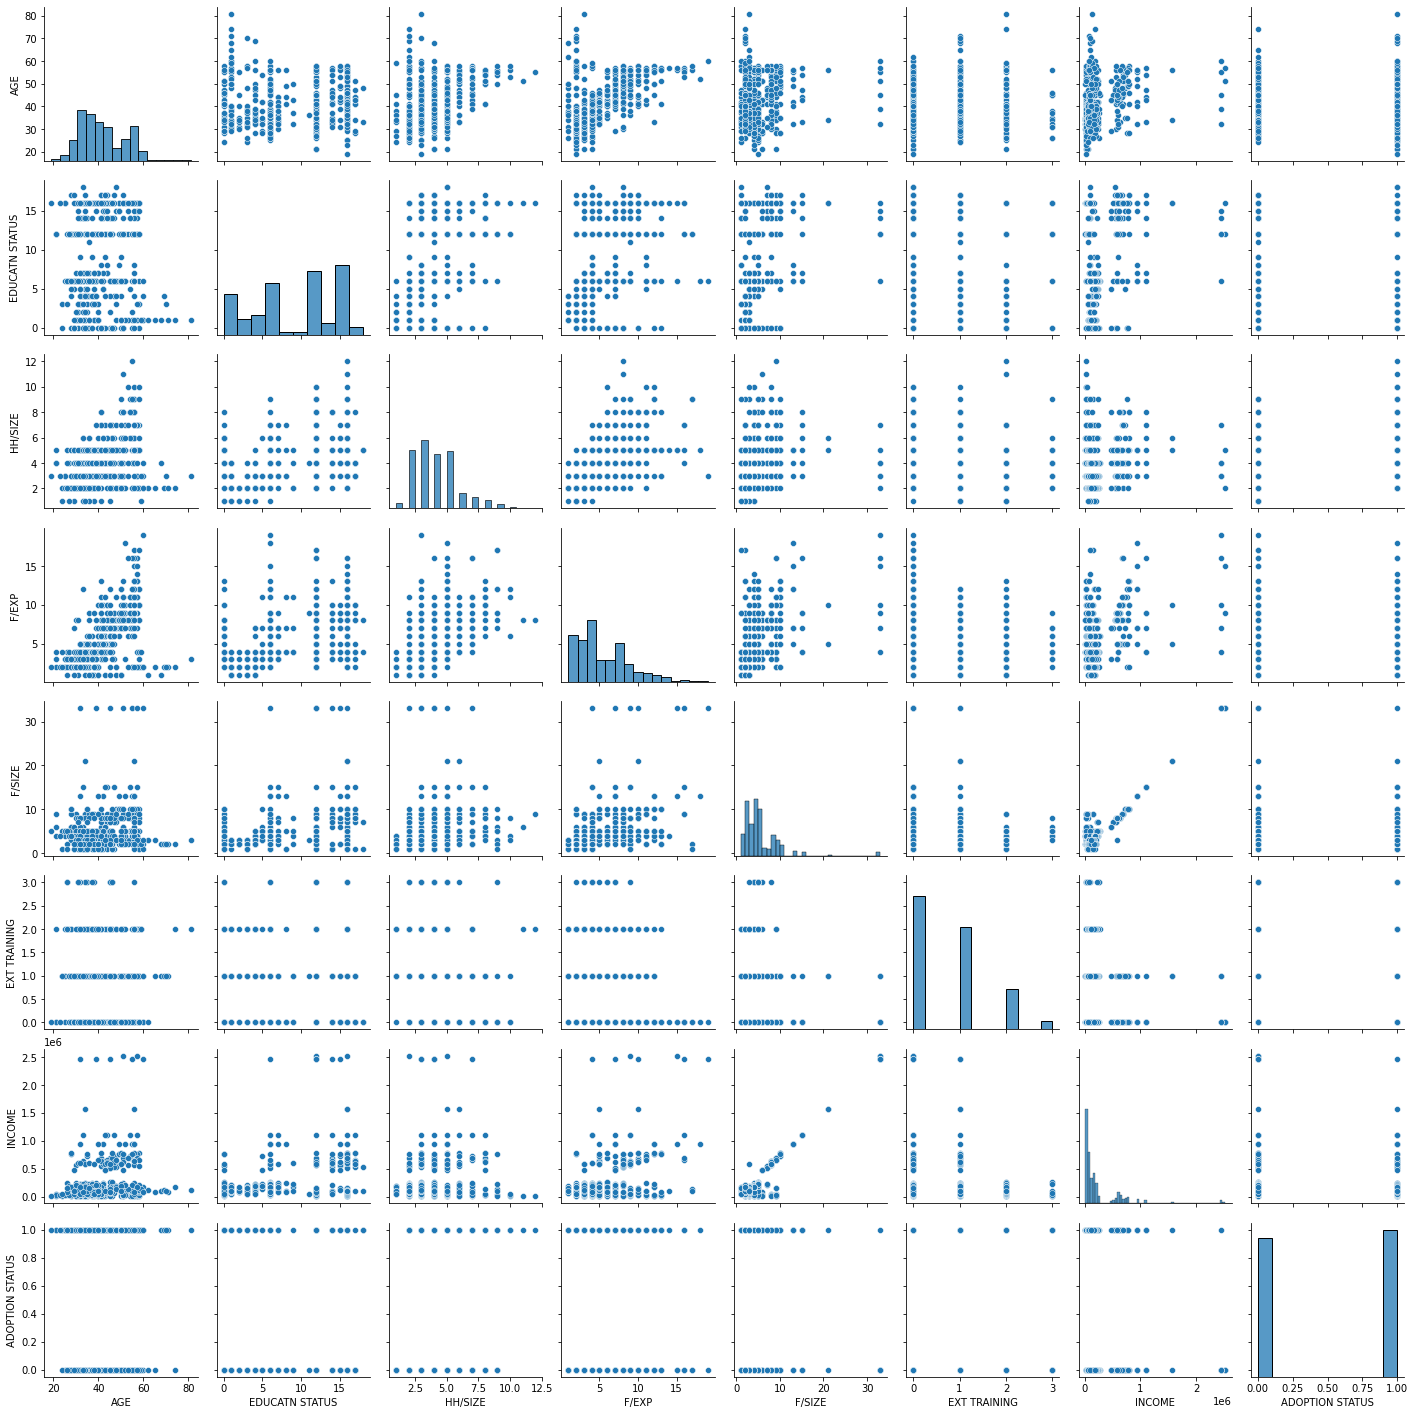

In [158]:
# For the last time, let's follow Jose Portilla, sorry Nicholas;
sns.pairplot(df);

So having done that jumbled beauty, let's use a considered approach.

In [159]:
# Create a function to visualize distribution and compare features on adoption basis.
def show_dist(data_col, data_frame=df):
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(1, 2, figsize = (15,6))

    # Plot the histogram   
    sns.histplot(data_col, ax=ax[0], kde=True)
    ax[0].set_ylabel("Frequency")
    
    # Plot the boxplot   
    sns.boxplot(y=data_col, x=data_frame["ADOPTION STATUS"], ax=ax[1])
    ax[1].set_ylabel("Frequency")
    
#     # Plot the barplot
#     sns.barplot(y=data_col, x=data_frame["ADOPTION STATUS"])

    # Add a title to the Figure
    fig.suptitle("Distribution of {} by ADOPTION STATUS".format(data_col.name));

    # Show the figure
    fig.show()


In [160]:
df["AGE"].name

'AGE'

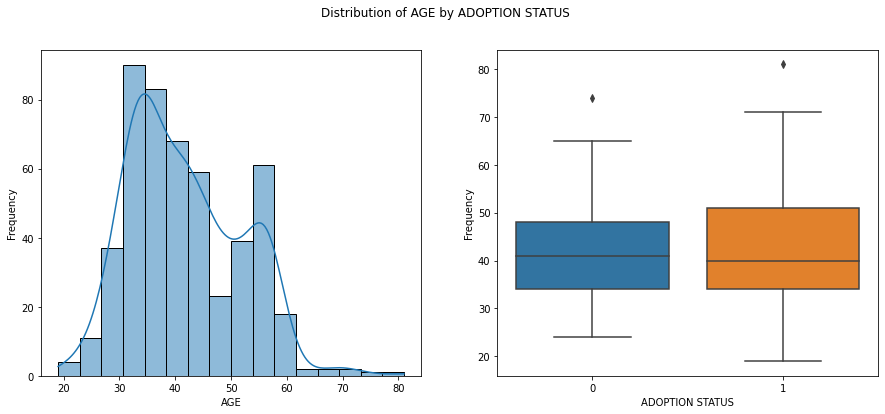

In [161]:
show_dist(df["AGE"])

AGE checks out as discussed earlier, Note though that generally, adopters(is that even a word), tended to be spread across a more varied age range. I wonder if that would remain if outliers are stripped, well we can check(for science of course).

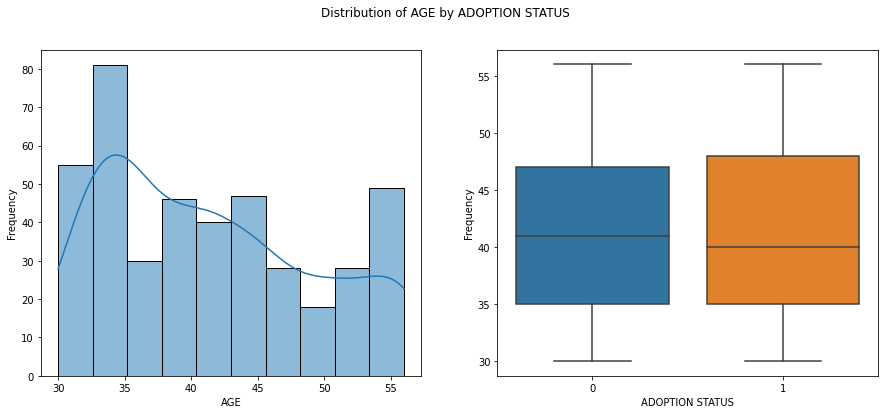

In [162]:
# Collect only data points between 10th and 90th percentile.
low, high = df["AGE"].quantile([0.1,0.9])
show_dist(df[df["AGE"].between(low, high)]["AGE"])

Not much in terms of changes besides, loping off valuable information(Notice younger repondents "somehow" went missing), So bin it.

With AGE being successfully analyzed, let's consider the others.

In [ ]:
# Let's loop through.
for cols in df.select_dtypes("number").drop(columns="ADOPTION STATUS"):
    show_dist(df[cols])

Now, that's one experiment I'm never trying again. Sure you can go ahead and run the code above(if you want headache).

SO, let's take them individually.

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AGE              501 non-null    int64 
 1   SEX              501 non-null    object
 2   EDUCATN STATUS   501 non-null    int64 
 3   HH/SIZE          501 non-null    int64 
 4   F/EXP            501 non-null    int64 
 5   F/SIZE           501 non-null    int64 
 6   EXT TRAINING     501 non-null    int64 
 7   INCOME           501 non-null    int64 
 8   ADOPTION STATUS  501 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 35.4+ KB


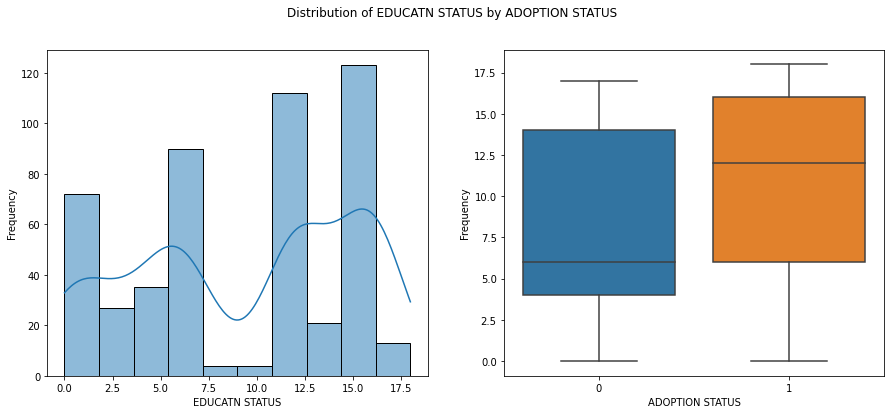

In [165]:
show_dist(df["EDUCATN STATUS"])

There are so many things wrong with this distribution, however, Its bodering on the ridiculous to even imagine that the average education of the farmers who have not adopted innovation, is about the same with the lower 25th percentile of those who adopted said technologies. Also, it isn't really too strange that there seems to be under representation in some years. The country(Nigeria), operates a 6-3-3-4, education system in theory, but in practice, it's more like 6-6-4, as most people who sucessfully complete their Junior secondary school years, eventually complete the Senior years(No reference). More work for future versions then.

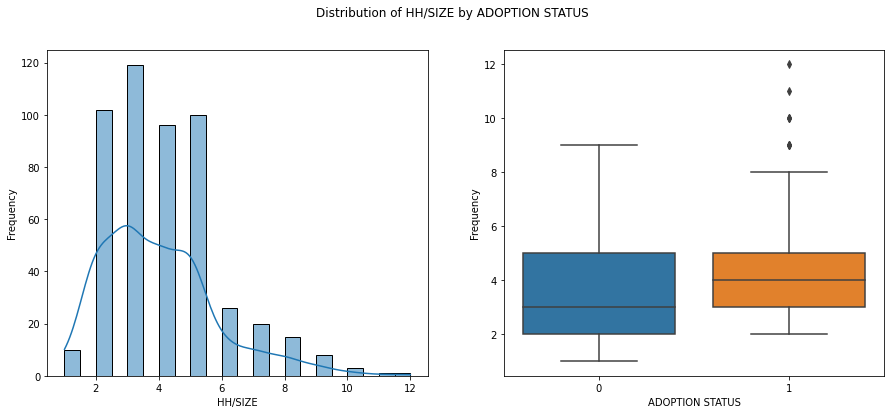

In [166]:
show_dist(df["HH/SIZE"])

We have a good distribution, if slighty skewed to the right, however, the outliers which make this so, still rings true in the rural communities, where polygamy is common and large households though on the wane are still a thing. Though, the average of 4 leaves a lot to be desired(God save us from unscrupulous data(No offenses)).

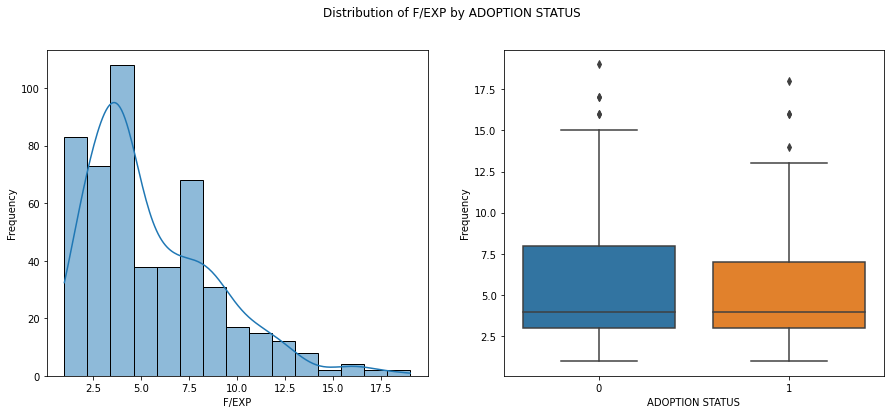

In [167]:
show_dist(df["F/EXP"])

Another good distribution which shows the slighly alarming state in the rural communities viz; Farmibg is on the decline(No references). Its been a trend noticed in the country that youths tend to consider farming as a lesser option compared to other economic activities. This trend, though interesting is beyond the scope of this data and subsequently project. As an intelligent(at least to me) woman once implied, the only world you can draw absolutely accurate inferences is the world your data represents.

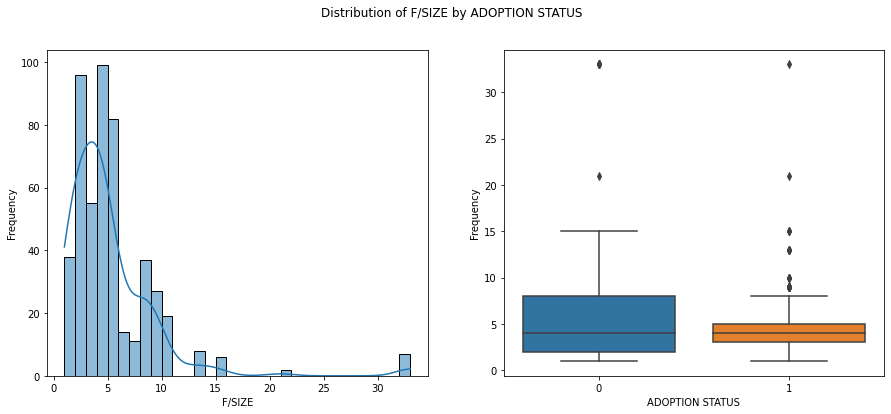

In [168]:
show_dist(df["F/SIZE"])

Now, where do we even begin with this travesty....I'll just leave you be till I have sufficient data. However, what's immediately apparent here is that most farmers are small to medium scale.

In [169]:
def show_cat_plot(data_col, data_frame=df):
    # Create a figure for 2 subplots (2 rows, 1 column)
    plt.figure(figsize = (15,6))

    # Plot the histogram   
    sns.countplot(x=data_col, hue="ADOPTION STATUS", data=data_frame, orient="v")
    
    # Add a title to the Figure
    plt.title("Data Distribution of {} by ADOPTION STATUS".format(data_col.name));

    # Show the figure
    #fig.show()



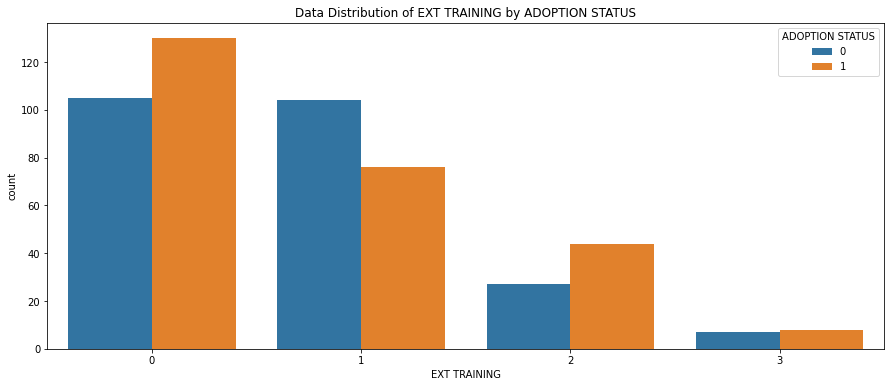

In [170]:
show_cat_plot(df["EXT TRAINING"])

From the above exposure to extensions services or trainings does not seem to have any effects poditively or negatively on adoption. However, an interesting note is that most adopters haven't had contact with any form of training.

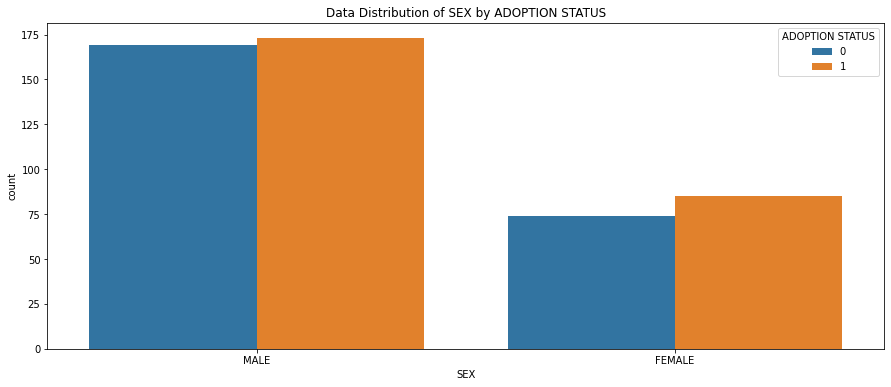

In [171]:
show_cat_plot(df["SEX"])

As seen above, SEX or GENDER does not seem to favour either categories. This is not to say there are no underlying issues or that the feature is useless, it simply implies that there is a good representation in the data.

Next, we discuss income(left on purpose).

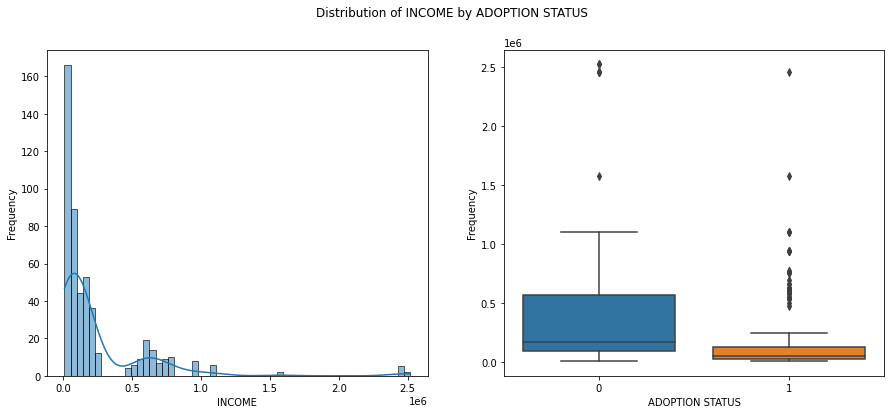

In [172]:
show_dist(df["INCOME"])

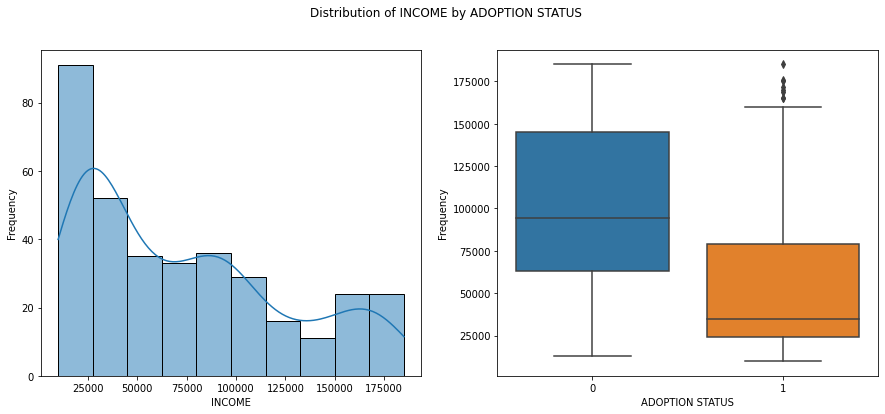

In [173]:
# Collect only data points between 10th and 90th percentile.
low, high = df["INCOME"].quantile([0,0.7])
show_dist(df[df["INCOME"].between(low, high)]["INCOME"])

The amateur statistician in me is crying as I can't afford to lop off a whopping 30% of "my precious" dataset. Let's train and see.

Finally to the target.

1    0.51497
0    0.48503
Name: ADOPTION STATUS, dtype: float64


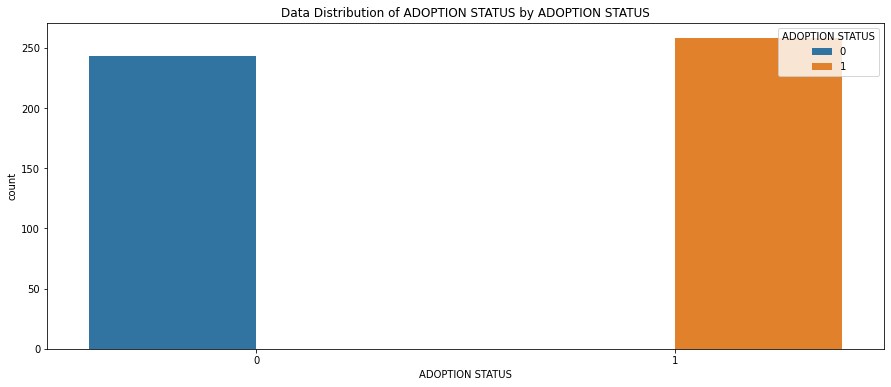

In [174]:
# check for class imbalance.
print(df["ADOPTION STATUS"].value_counts(normalize=True))
show_cat_plot(df["ADOPTION STATUS"])

The target attribute seems to be well balanced with adoption accounting for 51% of the farmers in the dataset, while 49% of said farmers did not adopt innovation.

### Feature Engineering
This is pretty meh, hopefully, will come back to it after, training.


In [175]:
# SYDD and Scale the data
from sklearn.model_selection import train_test_split

# Split to feature matrix and target vector.
target = "ADOPTION STATUS"
X = df.drop(columns=target)
y = df[target]

# Split to train, validation, and test data.
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

# print shapes
print(f" X's shape is {X.shape} and y's shape is {y.shape}.")
print(f" X_train's shape is {X_train.shape} and y_train's shape is {y_train.shape}.")
print(f" X_val's shape is {X_val.shape} and y_val's shape is {y_val.shape}.")
print(f" X_test's shape is {X_test.shape} and y_test's shape is {y_test.shape}.")

 X's shape is (501, 8) and y's shape is (501,).
 X_train's shape is (245, 8) and y_train's shape is (245,).
 X_val's shape is (105, 8) and y_val's shape is (105,).
 X_test's shape is (151, 8) and y_test's shape is (151,).


### Modelling
We'll be using three models viz:
* Random Forest classifier
* Logistic Regression
* XG Boost classifier
* SVM classifier(because why not, right?)
 
The one with the best performance(Accuracy) will be chosen.

In [176]:
X.head()

,AGE,SEX,EDUCATN STATUS,HH/SIZE,F/EXP,F/SIZE,EXT TRAINING,INCOME
0,32,MALE,6,5,4,3,0,30000
1,32,FEMALE,12,4,5,4,1,31000
2,55,MALE,0,5,7,5,0,29000
3,56,FEMALE,12,6,8,3,0,26000
4,26,MALE,12,5,4,5,3,23000


In [177]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: ADOPTION STATUS, dtype: int64

In [178]:
# Importing the estimators and preprocessors.
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [179]:
# Instantiate pipelines for relevant models.
clf_rf = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)


clf_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression(random_state=42)
)

clf_xgbc = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    XGBClassifier(random_state=42)
)

clf_svc = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    SVC(random_state=42)
)
      
model_list = [clf_rf, clf_lr, clf_xgbc, clf_svc]
model_list

[Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                 ('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(random_state=42))]),
 Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                 ('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(random_state=42))]),
 Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                 ('standardscaler', StandardScaler()),
                 ('xgbclassifier',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                gamma=None, gpu_id=N

Tried so hard(probably not accurate enough), to do some thing cool codewise, but "Machine Learning is not for perfectionists", so room to improve.

In [180]:
# Setting up a hyper parameter grid

hyper_grid = {
    clf_rf: {
        "randomforestclassifier__max_depth":range(1, 20 ,2),
        "randomforestclassifier__n_estimators":range(20, 200, 20)
        },
    clf_lr: {
        "logisticregression__max_iter":[500,1000,2000]
        },
    clf_xgbc:{
        "xgbclassifier__n_estimators":range(50, 100, 25),
        "xgbclassifier__learning_rate":[0.01, 0.03, 0.05]
    },
    clf_svc: {
        "svc__kernel":["linear", "poly", "rbf"]
        
    }
}


In [181]:
hyper_grid[clf_rf]

{'randomforestclassifier__max_depth': range(1, 20, 2),
 'randomforestclassifier__n_estimators': range(20, 200, 20)}

##### GRID SEARCH

In [182]:
# Run CV and time it.
import time

best_models = []
for algo in model_list:
    model = GridSearchCV(algo, param_grid=hyper_grid[algo], cv=5, n_jobs=-1)
    print('Starting training for {}'.format(algo))
    start_t = time.time()
    model.fit(X_train, y_train)
    best_models.append(model)
    
    end_t = round(time.time() - start_t, 2)
    print(f"{algo} has been successfully trained in {round(end_t/60, 4)} mins.")

Starting training for Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])
Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))]) has been successfully trained in 0.7935 mins.
Starting training for Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])
Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))]) has been successfully trained in 0.005 mins.
Startin

Training Over(messy code permitting), next is to evaluate and select the best model(s).

### Model Evaluation

In [183]:
from sklearn.metrics import classification_report, accuracy_score

We need to sort out the baseline first, this refers to the result of a certain guess work.

In [184]:
# Naive model
naive_model = y_train.value_counts(normalize=True).max()
print(f"Accuracy score for naive model is: {round(naive_model, 2)}")

Accuracy score for naive model is: 0.52


As shown above, guessing "Adoption" for all cases will result in a model with 52% accuracy, any thing lower than that is a waste.

In [185]:
best_models[1].best_estimator_

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['SEX'], use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=42))])

#### TRAINING DATA

In [186]:
# Get the classification report on all the best models per model(meta, right?) TRAINING DATA.
for algo in best_models:
    print(f"{algo.best_estimator_.named_steps}:\n{classification_report(y_train, algo.predict(X_train))}")

{'onehotencoder': OneHotEncoder(cols=['SEX'], use_cat_names=True), 'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(max_depth=3, n_estimators=120, random_state=42)}:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       117
           1       0.87      0.72      0.79       128

    accuracy                           0.80       245
   macro avg       0.80      0.80      0.80       245
weighted avg       0.81      0.80      0.80       245

{'onehotencoder': OneHotEncoder(cols=['SEX'], use_cat_names=True), 'standardscaler': StandardScaler(), 'logisticregression': LogisticRegression(max_iter=500, random_state=42)}:
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       117
           1       0.78      0.62      0.70       128

    accuracy                           0.71       245
   macro avg       0.72      0.72      0.71       245
weighted avg       0.7

#### VALIDATION DATA

In [187]:
# Get the classification report on all the best models per model(meta, right?) VALIDATION DATA.
for algo in best_models:
    print(f"{algo.best_estimator_.named_steps}:\n{classification_report(y_val, algo.predict(X_val))}")

{'onehotencoder': OneHotEncoder(cols=['SEX'], use_cat_names=True), 'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(max_depth=3, n_estimators=120, random_state=42)}:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        53
           1       0.80      0.63      0.71        52

    accuracy                           0.74       105
   macro avg       0.75      0.74      0.74       105
weighted avg       0.75      0.74      0.74       105

{'onehotencoder': OneHotEncoder(cols=['SEX'], use_cat_names=True), 'standardscaler': StandardScaler(), 'logisticregression': LogisticRegression(max_iter=500, random_state=42)}:
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        53
           1       0.72      0.56      0.63        52

    accuracy                           0.68       105
   macro avg       0.69      0.68      0.67       105
weighted avg       0.6

Random Forest seems to be carrying the day, however, finally, over to the test data(Copy & paste). Before that though, let's tweak XGB Classifier or let's not, for now(perfectionist connudrum aka indecision).

#### **TEST DATA**

In [188]:
# Get the classification report on all the best models per model(meta, right?) TEST DATA.
for algo in best_models:
    print(f"{algo.best_estimator_.named_steps}:\n{classification_report(y_val, algo.predict(X_val))}")

{'onehotencoder': OneHotEncoder(cols=['SEX'], use_cat_names=True), 'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(max_depth=3, n_estimators=120, random_state=42)}:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        53
           1       0.80      0.63      0.71        52

    accuracy                           0.74       105
   macro avg       0.75      0.74      0.74       105
weighted avg       0.75      0.74      0.74       105

{'onehotencoder': OneHotEncoder(cols=['SEX'], use_cat_names=True), 'standardscaler': StandardScaler(), 'logisticregression': LogisticRegression(max_iter=500, random_state=42)}:
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        53
           1       0.72      0.56      0.63        52

    accuracy                           0.68       105
   macro avg       0.69      0.68      0.67       105
weighted avg       0.6

Unsuprisingly, the Random Forest classifier seems to have performed better than its counterparts(what, with the extreme gradient booster chillin on overfittin).

### Extraction for Deployment

In [189]:
best_models[0].best_estimator_

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['SEX'], use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, n_estimators=120,
                                        random_state=42))])

In [190]:
import pickle
model_filename = "Farmer-Adoption-model.pkl"
pickle.dump(best_models[0].best_estimator_, open(model_filename,"wb"))

In [191]:
# check 
model = pickle.load(open("Farmer-Adoption-model.pkl", "rb"))
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
model

              precision    recall  f1-score   support

           0       0.71      0.86      0.78        73
           1       0.84      0.67      0.74        78

    accuracy                           0.76       151
   macro avg       0.77      0.76      0.76       151
weighted avg       0.78      0.76      0.76       151



Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['SEX'], use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, n_estimators=120,
                                        random_state=42))])

So, that's the prediction aspect sorted. Now over to the clustering which will be a continuation.

In [204]:
# Slice out Farmers who adopted
mask = df["ADOPTION STATUS"] == 1
df_adopted = df[mask]

In [199]:
# Import dependencies
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

For explainability, we want minimum 3 clusters, max 5.

In [232]:
# Setting up n_clusters, and the other relevant lists.
n_clusters = range(2,15)
inertia_errors = []
silhouette_scores = []
X_adopt = df_adopted.drop(columns="ADOPTION STATUS")
oh = OneHotEncoder(use_cat_names=True)
# Lets track the time.
start_time = time.time()
# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    # initiatialize pipeline model and train.
    print(f"Model {k-1} is starting to train.")
    model_cl = make_pipeline(OneHotEncoder(use_cat_names=True), 
                          StandardScaler(),
                          KMeans(random_state=42, n_clusters=k))
    model_cl.fit(X_adopt)
    # Get Inertia errors and Silhoutte scores.
    inertia_errors.append(model_cl.named_steps["kmeans"].inertia_)
    silhouette_scores.append(silhouette_score(oh.fit_transform(X_adopt.copy()), model_cl.named_steps["kmeans"].labels_))
    
 # Time tracking activated.   
elapsed_time = round(time.time() - start_time, 2)
print(f"Hyperparameter tuning ended in {elapsed_time}s.")
print("Inertia:", inertia_errors[:3])
print()
print("Silhouette Scores:", silhouette_scores[:3])

Model 1 is starting to train.
Model 2 is starting to train.
Model 3 is starting to train.
Model 4 is starting to train.
Model 5 is starting to train.
Model 6 is starting to train.
Model 7 is starting to train.
Model 8 is starting to train.
Model 9 is starting to train.
Model 10 is starting to train.
Model 11 is starting to train.
Model 12 is starting to train.
Model 13 is starting to train.
Hyperparameter tuning ended in 2.4s.
Inertia: [1782.2363014391112, 1464.477437035218, 1263.9374401038021]

Silhouette Scores: [-0.03717131120698598, 0.05618663752608206, 0.021396560851206496]


In [233]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(x=n_clusters, y=inertia_errors, title="K-Means Model: Inertia vs Number of Clusters")
fig.update_layout(xaxis_title="Number of Clusters", yaxis_title="Inertia")
fig.show()

In [234]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line( x= n_clusters, y=silhouette_scores, title="K-Means Model: Silhouette Score vs Number of Clusters")
fig.update_layout(
    xaxis_title="Number of Clusters", yaxis_title="Silhouette Score")

fig.show()

In [241]:
final_model = make_pipeline(OneHotEncoder(use_cat_names=True), StandardScaler(), KMeans(n_clusters=4, random_state=42))
final_model.fit(X)


Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [257]:
sc = StandardScaler()
X = oh.fit_transform(X)
X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=df.columns)

centroids = final_model.named_steps["kmeans"].cluster_centers_
labels = final_model.named_steps["kmeans"].labels_
print(labels[:5])

[3 1 0 1 3]


In [243]:
# Instantiate transformer
pca = PCA(n_components=2, random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns=["PC1", "PC2"])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (501, 2)


,PC1,PC2
0,-0.956209,0.490031
1,-0.087622,-2.266843
2,0.032185,1.023181
3,1.615276,-1.887050
4,-1.437325,0.554472


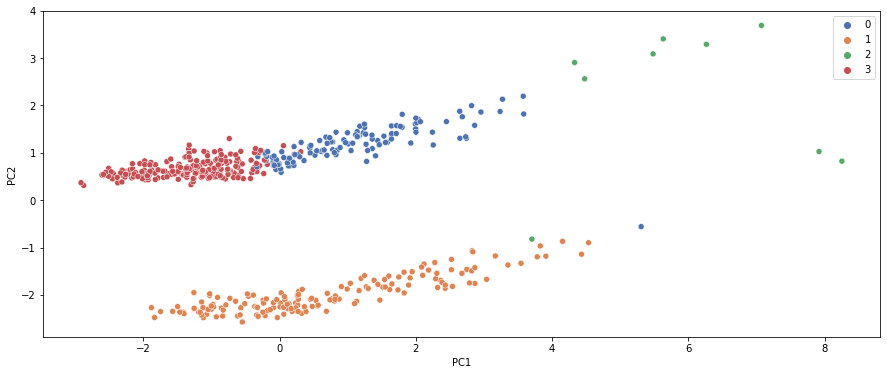

In [256]:
# Create scatter plot of `PC2` vs `PC1`
plt.figure(figsize=(15,6))
sns.scatterplot( data=X_pca, x="PC1", y="PC2", hue=labels, palette="deep")
#plt.scatter(x=centroids[:, 0], y=centroids[:, 1], marker="*", s=150, color="gray")
plt.xlabel("PC1")
plt.ylabel("PC2");


Well Honestly, that didn't go so well, but at least there will be less work as soon as additional data becomes available.

### **CONCLUSION**
In summary, the data was explored, visualized, and a model was trained with above average performance. The farmers who adopted were also clustered(attempted) into 4 groups. We shall attempt to deploy the model and see how it works on dynamic data. 